<a href="https://colab.research.google.com/github/peculab/DFTDescriptorPipeline/blob/main/examples/azoarene/azoarene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
!rm -rf /usr/local/lib/python3.11/dist-packages/descriptors

In [155]:
# ✅ Reset environment
%cd /content
import shutil, os, sys, importlib

# 🔁 Uninstall pip-installed descriptors
!pip uninstall -y descriptors

# 🔥 Clear cached modules
for k in list(sys.modules.keys()):
    if k.startswith("descriptors"):
        del sys.modules[k]

# 🧹 Remove previous repo
if os.path.exists("DFTDescriptorPipeline"):
    shutil.rmtree("DFTDescriptorPipeline")

/content


In [156]:
# ✅ Install required packages
!pip install morfeus-ml scikit-learn joblib matplotlib openpyxl

# ✅ Clone the latest repo
!git clone https://github.com/peculab/DFTDescriptorPipeline.git

Cloning into 'DFTDescriptorPipeline'...
remote: Enumerating objects: 586, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 586 (delta 10), reused 3 (delta 3), pack-reused 567 (from 1)
Receiving objects: 100% (586/586), 35.58 MiB | 10.70 MiB/s, done.
Resolving deltas: 100% (356/356), done.
Updating files: 100% (96/96), done.


In [157]:
# ✅ Set module path
from morfeus import read_xyz, Sterimol
from morfeus.utils import get_radii

import shutil, os, sys, importlib
sys.path.insert(0, "/content/DFTDescriptorPipeline/descriptors")
import extractor_regr
import glob, os
importlib.reload(extractor_regr)

<module 'extractor_regr' from '/content/DFTDescriptorPipeline/descriptors/extractor_regr.py'>

In [158]:
# ✅ Set module path
data_dir = "/content/DFTDescriptorPipeline/examples/azoarene"
xlsx_path = glob.glob(os.path.join(data_dir, "*.xlsx"))[0]
log_folder = os.path.join(data_dir, "logfiles")

In [159]:
import pandas as pd

modified_xlsx_path = "/content/DFTDescriptorPipeline/examples/azoarene/Azoarene_with_Ar.xlsx"

df = pd.read_excel(xlsx_path)

In [160]:
df

,Compound,Ar1,Ar2,rate kobs (s-1),ln(kobs)
0,A1,1,2,2.100000e-07,-15.376158
1,A2,1,3,3.800000e-07,-14.783095
2,A3,1,4,1.100000e-07,-16.022785
3,A4,1,5,1.500000e-06,-13.410045
4,A5,1,6,7.600000e-09,-18.695118
5,A6,1,7,7.700000e-07,-14.076875
6,A7,1,8,7.400000e-07,-14.116616
7,A8,1,9,1.600000e-05,-11.042922
8,A9,1,10,2.200000e-06,-13.027053
9,A10,1,11,7.600000e-04,-7.182192


In [161]:
df_ar2 = df.copy()
df_ar1 = df.copy()
df_ar1['Ar'] = df_ar1['Ar1']
df_ar2['Ar'] = df_ar2['Ar2']
df_ar1 = df_ar1[~df_ar1["Ar"].isin(df_ar2["Ar"])]
df_combined = pd.concat([df_ar2, df_ar1], ignore_index=True)

In [162]:
df_combined

,Compound,Ar1,Ar2,rate kobs (s-1),ln(kobs),Ar
0,A1,1,2,2.100000e-07,-15.376158,2
1,A2,1,3,3.800000e-07,-14.783095,3
2,A3,1,4,1.100000e-07,-16.022785,4
3,A4,1,5,1.500000e-06,-13.410045,5
4,A5,1,6,7.600000e-09,-18.695118,6
5,A6,1,7,7.700000e-07,-14.076875,7
6,A7,1,8,7.400000e-07,-14.116616,8
7,A8,1,9,1.600000e-05,-11.042922,9
8,A9,1,10,2.200000e-06,-13.027053,10
9,A10,1,11,7.600000e-04,-7.182192,11


In [163]:
# Save new file
df_combined.to_excel(modified_xlsx_path, index=False)

print("✔ new xlsx_path =", modified_xlsx_path)

✔ new xlsx_path = /content/DFTDescriptorPipeline/examples/azoarene/Azoarene_with_Ar.xlsx


Streaming output truncated to the last 5000 lines.
❌ ['Ar2_Ar_v_C=O', 'Ar2_Ar_HOMO', 'Ar2_Ar_c', 'Ar2_Ar_Ster_L', 'Ar2_Ar_Ster_B1'] | skipped (R² < 0.7 or error)
❌ ['Ar2_Ar_v_C=O', 'Ar2_Ar_HOMO', 'Ar2_Ar_c', 'Ar2_Ar_Ster_L', 'Ar2_Ar_Ster_B5'] | skipped (R² < 0.7 or error)
❌ ['Ar2_Ar_v_C=O', 'Ar2_Ar_HOMO', 'Ar2_Ar_c', 'Ar2_Ar_Ster_B1', 'Ar2_Ar_Ster_B5'] | skipped (R² < 0.7 or error)
❌ ['Ar2_Ar_v_C=O', 'Ar2_Ar_HOMO', 'Ar2_Ar_e', 'Ar2_Ar_a', 'Ar2_Ar_b'] | skipped (R² < 0.7 or error)
❌ ['Ar2_Ar_v_C=O', 'Ar2_Ar_HOMO', 'Ar2_Ar_e', 'Ar2_Ar_a', 'Ar2_Ar_d'] | skipped (R² < 0.7 or error)
❌ ['Ar2_Ar_v_C=O', 'Ar2_Ar_HOMO', 'Ar2_Ar_e', 'Ar2_Ar_a', 'Ar2_Ar_f'] | skipped (R² < 0.7 or error)
❌ ['Ar2_Ar_v_C=O', 'Ar2_Ar_HOMO', 'Ar2_Ar_e', 'Ar2_Ar_a', 'Ar2_Ar_g'] | skipped (R² < 0.7 or error)
❌ ['Ar2_Ar_v_C=O', 'Ar2_Ar_HOMO', 'Ar2_Ar_e', 'Ar2_Ar_a', 'Ar2_Ar_Ster_L'] | skipped (R² < 0.7 or error)
❌ ['Ar2_Ar_v_C=O', 'Ar2_Ar_HOMO', 'Ar2_Ar_e', 'Ar2_Ar_a', 'Ar2_Ar_Ster_B1'] | skipped (R² < 0.7 or error)
❌ ['

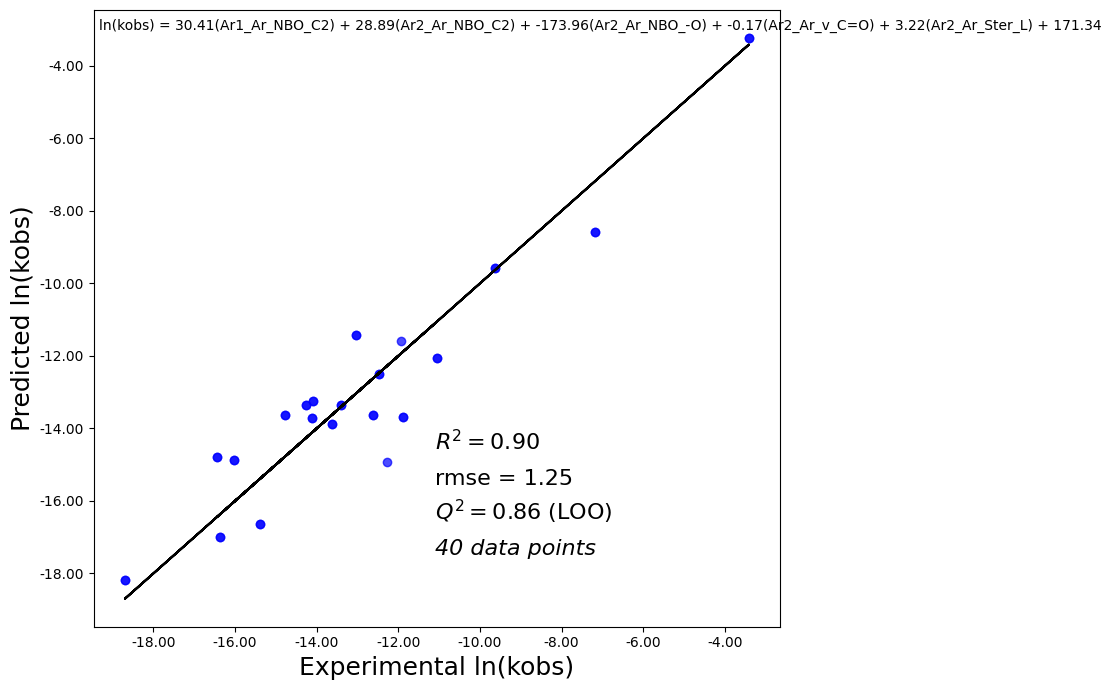


✅ Analysis complete!


In [164]:
# One-click execution
df, results, best_model = extractor_regr.run_full_pipeline(
    log_folder=log_folder,
    xlsx_path=modified_xlsx_path,
    target='ln(kobs)'
)